# BASELINE  MODEL (Using ARIMA model)

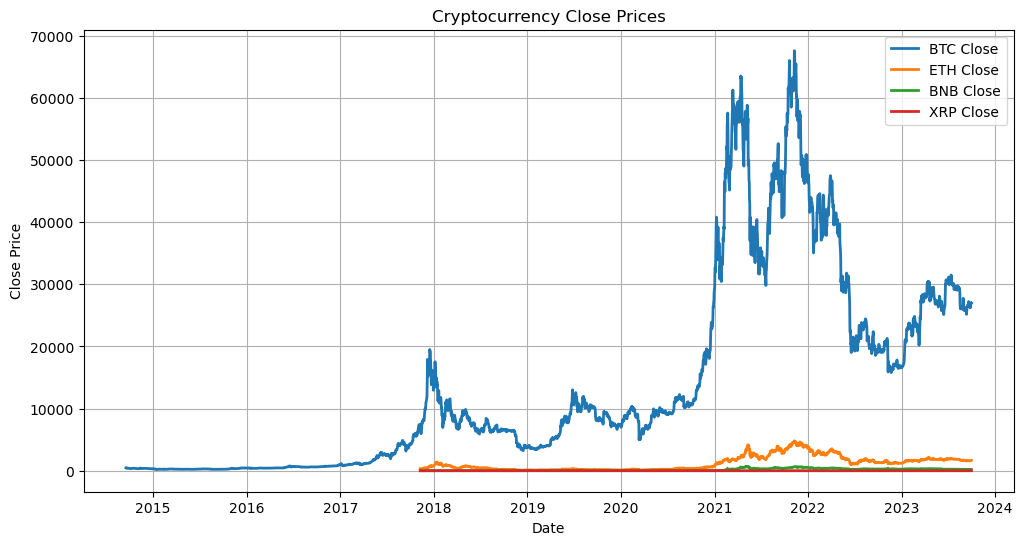

In [17]:
# Needing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings
from itertools import product
from datetime import datetime
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score 
# Loading Crypto CSV file
btc_data = pd.read_csv("BTC-USD.csv")
eth_data = pd.read_csv("ETH-USD.csv")
bnb_data = pd.read_csv("BNB-USD.csv")
xrp_data = pd.read_csv("XRP-USD.csv")
# Correcting 'Date' column into datetime format
btc_data['Date'] = pd.to_datetime(btc_data['Date'], format='%Y-%m-%d')
eth_data['Date'] = pd.to_datetime(eth_data['Date'], format='%Y-%m-%d')
bnb_data['Date'] = pd.to_datetime(bnb_data['Date'], format='%Y-%m-%d')
xrp_data['Date'] = pd.to_datetime(xrp_data['Date'], format='%Y-%m-%d')
# Setting 'Date' column as index
btc_data.set_index('Date', inplace=True)
eth_data.set_index('Date', inplace=True)
bnb_data.set_index('Date', inplace=True)
xrp_data.set_index('Date', inplace=True)
# plotting the target variable: Close
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Close'], label='BTC Close', linewidth=2)
plt.plot(eth_data['Close'], label='ETH Close', linewidth=2)
plt.plot(bnb_data['Close'], label='BNB Close', linewidth=2)
plt.plot(xrp_data['Close'], label='XRP Close', linewidth=2)
# Show the plot
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Cryptocurrency Close Prices')
plt.legend()  
plt.grid(True)
plt.show()

# Working with  BITCOIN historical data

In [18]:
print(btc_data)  # Viewing the BITCOIN dataset 
print(btc_data.describe(),btc_data.info()) # describing the data
# checking for Missing values and NA
print('Null Values:',btc_data.isnull().values.sum())
print('NA values:',btc_data.isnull().values.any())

                    Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2023-09-26  26294.757813  26389.884766  26090.712891  26217.250000   
2023-09-27  26209.498047  26817.841797  26111.464844  26352.716797   
2023-09-28  26355.812500  27259.500000  26327.322266  27021.546875   
2023-09-29  27024.841797  27225.937500  26721.763672  26911.720703   
2023-09-30  26900.173828  26997.414063  26889.638672  26954.935547   

               Adj Close       Volume  
Date                                   
2014-09-1

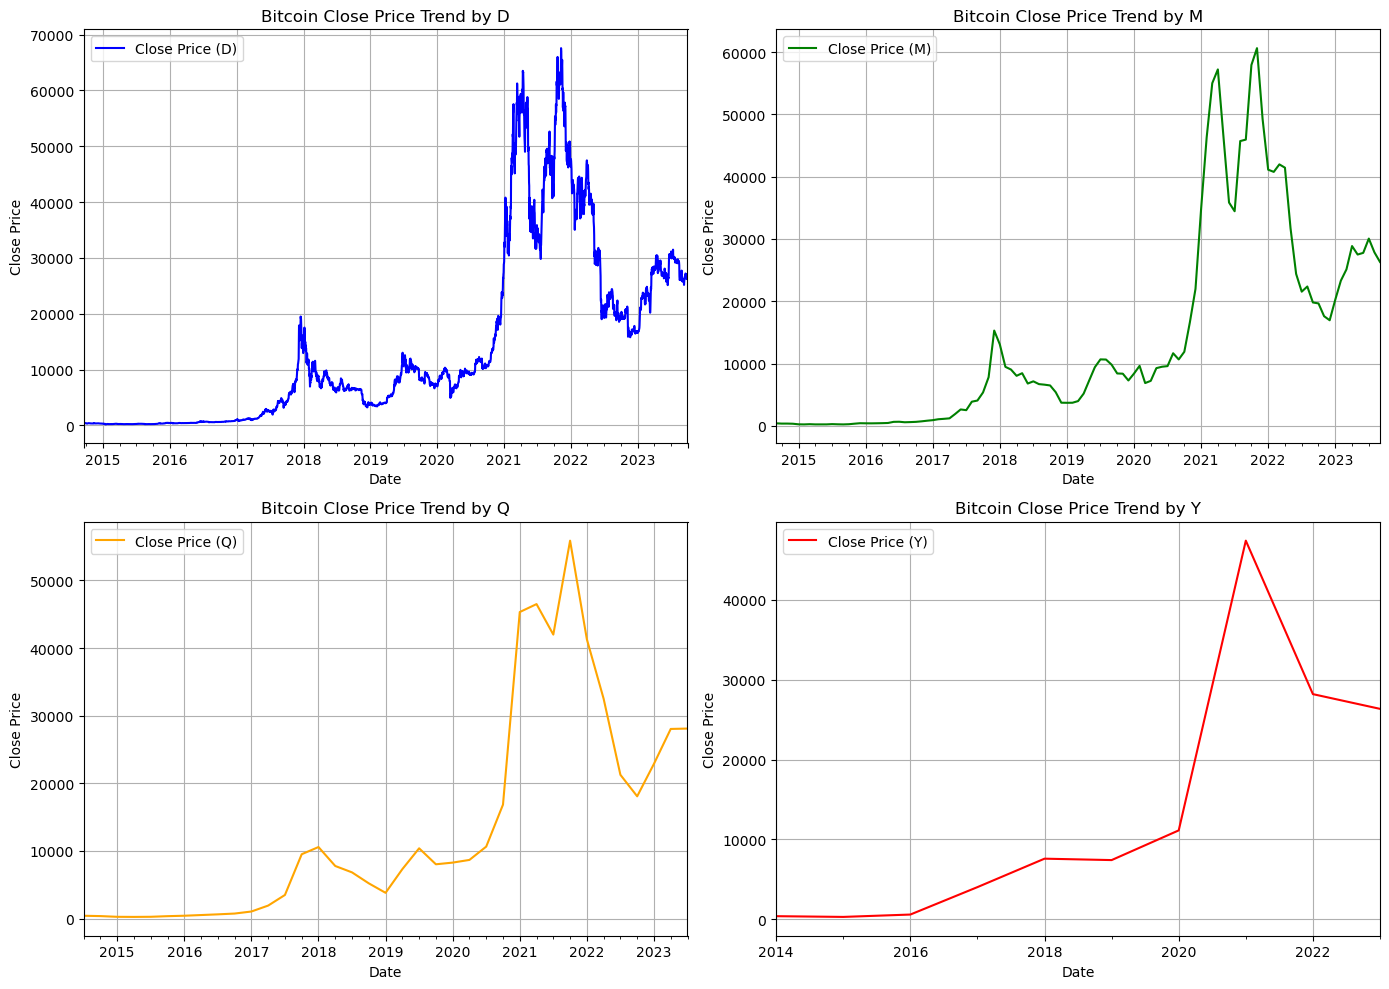

In [19]:
# Creating a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# Define the resampling frequencies
resample_freqs = [ 'D','M', 'Q', 'Y']
colors = ['blue','green', 'orange', 'red']
# Plotting data and Adjustment of layout
for i, (freq, color) in enumerate(zip(resample_freqs, colors)):
    btc_resampled = btc_data.resample(freq).mean()
    btc_data['Close'].resample(freq).mean().plot(ax=axes[i // 2, i % 2], label=f'Close Price ({freq})', color=color)
    axes[i // 2, i % 2].set_title(f'Bitcoin Close Price Trend by {freq}')
    axes[i // 2, i % 2].set_xlabel('Date')
    axes[i // 2, i % 2].set_ylabel('Close Price')
    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].grid(True)   
plt.tight_layout()
plt.show()

# Decomposition : Seasonality, Treand  and  Residual

The 'Close' price series (D) is not stationary (p-value > 0.05), p-value = 0.47685386298445115
The 'Close' price series (M) is not stationary (p-value > 0.05), p-value = 0.4878078363361543
The 'Close' price series (Q) is not stationary (p-value > 0.05), p-value = 0.6507156237274263
The 'Close' price series (Y) is not stationary (p-value > 0.05), p-value = 1.0
The components error for Y: period must be a positive integer >= 2


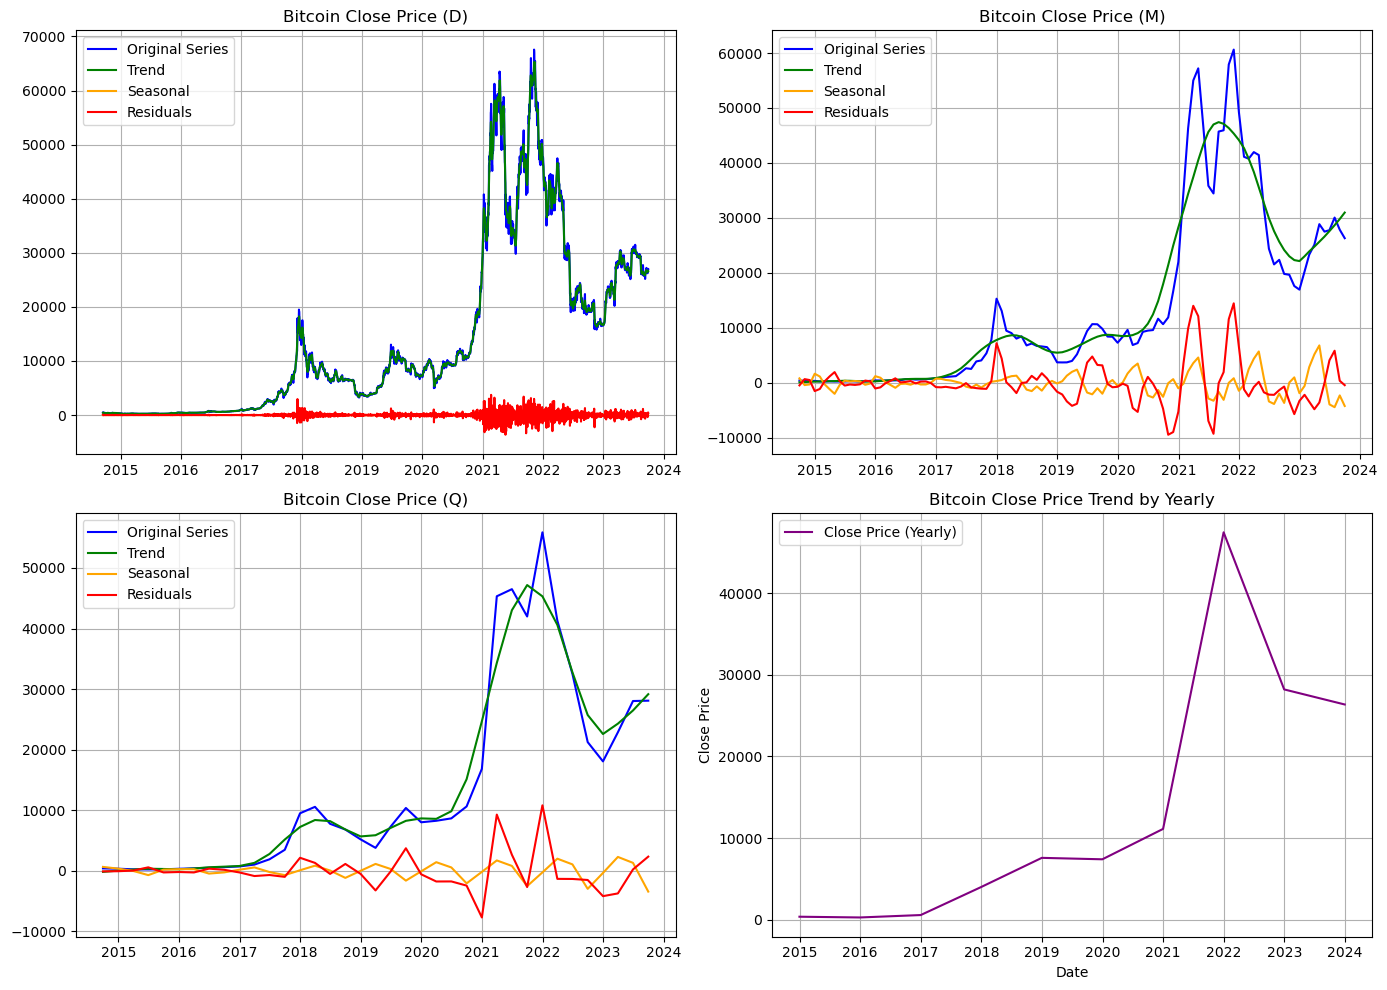

In [20]:
# Creating subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# ADF test and STL decomposition
for i, (freq, color) in enumerate(zip(resample_freqs, colors)):
    btc_resampled = btc_data.resample(freq).mean()
    # Perform ADF test
    adf_result = adfuller(btc_resampled['Close'])
    adf_pvalue = adf_result[1]
    # Testing Stationary
    if adf_pvalue <= 0.05:
        stationarity = "stationary (p-value<=0.05)"
    else:
        stationarity = "not stationary (p-value > 0.05)"
    print(f"The 'Close' price series ({freq}) is {stationarity}, p-value = {adf_pvalue}")
    # STL decomposition
    try:
        stl_decomp = STL(btc_resampled['Close'], seasonal=365)
        result = stl_decomp.fit()
        # Plotting all on one graph 
        axes[i // 2, i % 2].plot(btc_resampled['Close'], label='Original Series', color='blue')
        axes[i // 2, i % 2].plot(result.trend, label='Trend', color='green')
        axes[i // 2, i % 2].plot(result.seasonal, label='Seasonal', color='orange')
        axes[i // 2, i % 2].plot(result.resid, label='Residuals', color='red')
        axes[i // 2, i % 2].set_title(f'Bitcoin Close Price ({freq})')
        axes[i // 2, i % 2].legend()
        axes[i // 2, i % 2].grid(True)
    except ValueError as e:
        print(f"The components error for {freq}: {e}")
# Additional plot(yearly)
btc_year = btc_data.resample('Y').mean()
axes[1, 1].plot(btc_year['Close'], label='Close Price (Yearly)', color='purple')
axes[1, 1].set_title('Bitcoin Close Price Trend by Yearly')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Close Price')
axes[1, 1].legend()
axes[1, 1].grid(True)
plt.tight_layout()
plt.show()

# Decomposition (using daily Historical data)

The 'Close' price series (Daily) is not stationary (p-value> 0.05), p-value = 0.47685386298445115


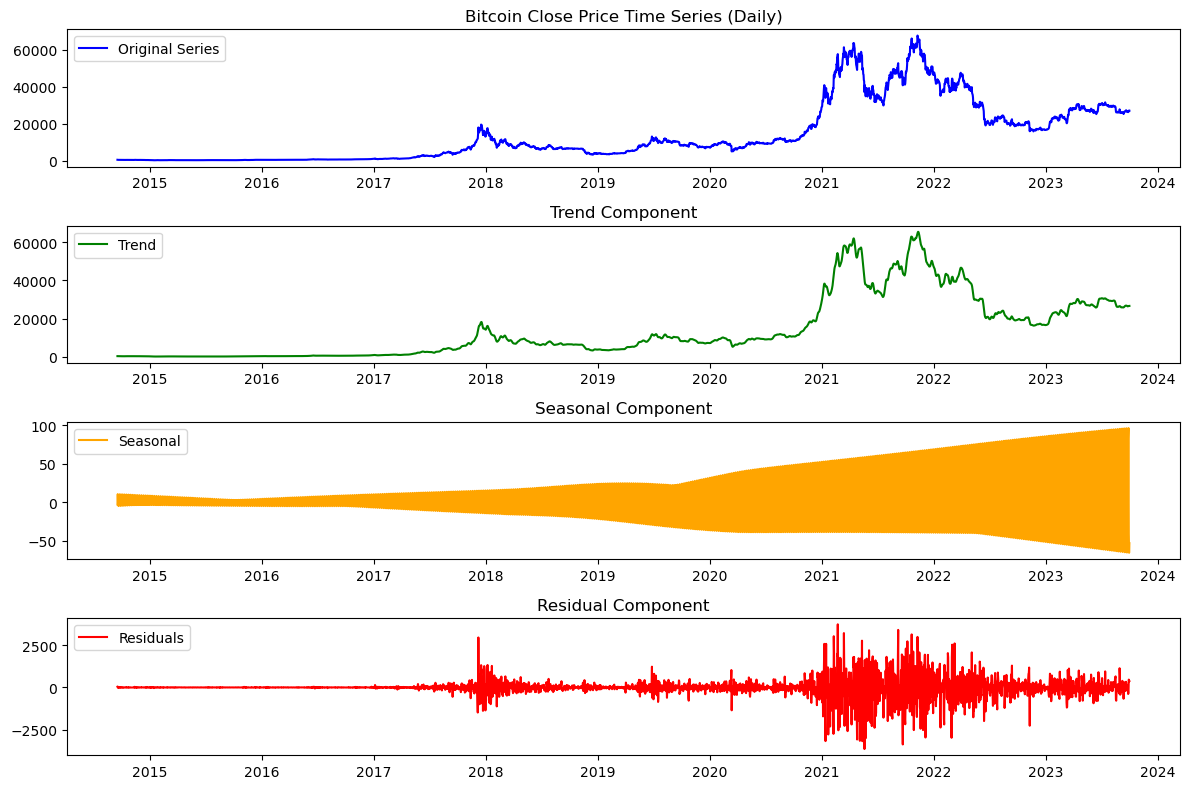

In [22]:
# ADF test
btc_day = btc_data.resample('D').mean()
adf_result = adfuller(btc_day['Close'])
adf_pvalue = adf_result[1]
# stationary Checking Test
if adf_pvalue <= 0.05:
    stationarity = "stationary (p-value<= 0.05)"
else:
    stationarity = "not stationary (p-value> 0.05)"
print(f"The 'Close' price series (Daily) is {stationarity}, p-value = {adf_pvalue}")
# STL decomposition
stl_decomp = STL(btc_day['Close'], seasonal=365)
result = stl_decomp.fit()
# Plot all components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(btc_day['Close'], label='Original Series', color='blue')
plt.legend(loc='upper left')
plt.title('Bitcoin Close Price Time Series (Daily)')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='orange')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(result.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

# ACF  and PACF

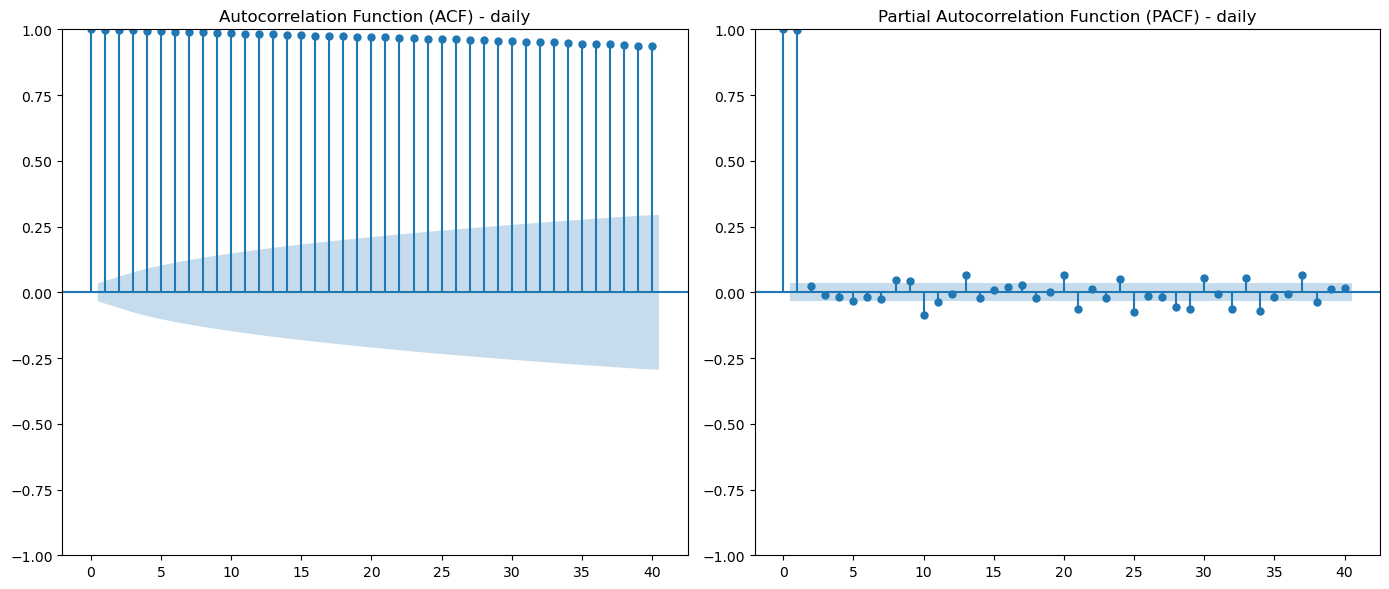

In [23]:
# Creating 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
# Plot ACF 
plot_acf(btc_day['Close'], lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) - daily')
# Plot PACF
plot_pacf(btc_data['Close'], lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) - daily')
plt.tight_layout()
plt.show()

# Box-Cox, Seasonal and Regular transformations

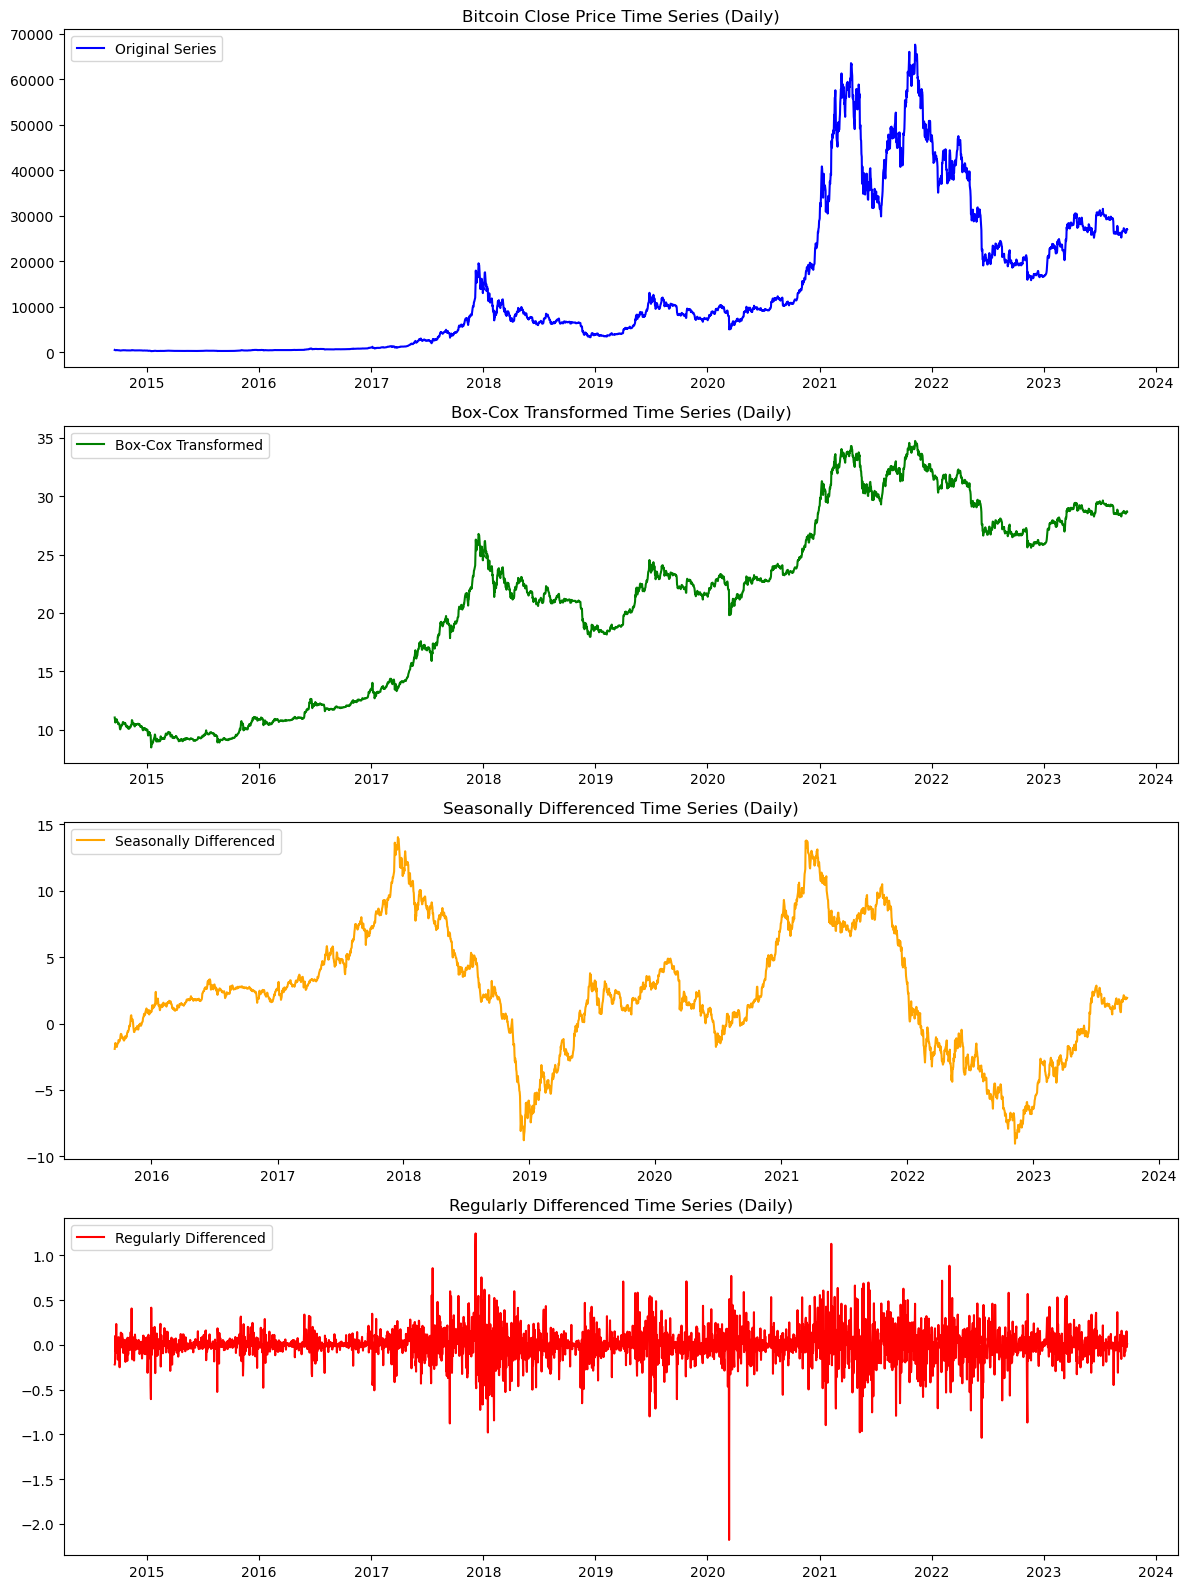

Box-Cox Transformed Series:
   - Augmented Dickey-Fuller Test p-value: 0.7325
Seasonally Differenced Series:
   - Augmented Dickey-Fuller Test p-value: 0.2980
Regularly Differenced Series:
   - Augmented Dickey-Fuller Test p-value: 0.0000

Best-fit lambda parameter for Box-Cox transformation: 0.17672193617866955


In [24]:
# Extract the 'Close' price series
close_price = btc_day['Close']
# Perform Box-Cox transformation TO TRY TO ELIMINATE THE VARIANCE
btc_day['transformed_close'], lambda_best_fit = boxcox(close_price)
# Perform seasonal differencing for btc_day
period = 365  # Assuming yearly seasonality for daily data
seasonal_difference = btc_day['transformed_close'].diff(period).dropna()
# removing trend
regular_difference = btc_day['transformed_close'].diff().dropna()
# Plot the original, Box-Cox transformed, seasonally differenced, and regularly differenced series
plt.figure(figsize=(12, 16))
# Original Series
plt.subplot(4, 1, 1)
plt.plot(close_price, label='Original Series', color='blue')
plt.legend(loc='upper left')
plt.title('Bitcoin Close Price Time Series (Daily)')
# Box-Cox Transformed Series
plt.subplot(4, 1, 2)
plt.plot(btc_day['transformed_close'], label='Box-Cox Transformed', color='green')
plt.legend(loc='upper left')
plt.title('Box-Cox Transformed Time Series (Daily)')
# Seasonally Differenced Series
plt.subplot(4, 1, 3)
plt.plot(seasonal_difference, label='Seasonally Differenced', color='orange')
plt.legend(loc='upper left')
plt.title('Seasonally Differenced Time Series (Daily)')
# Regularly Differenced Series
plt.subplot(4, 1, 4)
plt.plot(regular_difference, label='Regularly Differenced', color='red')
plt.legend(loc='upper left')
plt.title('Regularly Differenced Time Series (Daily)')
plt.tight_layout()
plt.show()
# Print ADF test results
adf_result_transformed = adfuller(btc_day['transformed_close'])
adf_result_seasonal_diff = adfuller(seasonal_difference)
adf_result_regular_diff = adfuller(regular_difference)
print("Box-Cox Transformed Series:")
print(f"   - Augmented Dickey-Fuller Test p-value: {adf_result_transformed[1]:.4f}")
print("Seasonally Differenced Series:")
print(f"   - Augmented Dickey-Fuller Test p-value: {adf_result_seasonal_diff[1]:.4f}")
print("Regularly Differenced Series:")
print(f"   - Augmented Dickey-Fuller Test p-value: {adf_result_regular_diff[1]:.4f}")
print("\nBest-fit lambda parameter for Box-Cox transformation:", lambda_best_fit)

# parameters search and AIC info

In [25]:
# Defining parameter ranges
Qs = range(0, 2)  # Seasonal MA order
qs = range(0, 2)  # MA order
Ps = range(0, 2)  # Seasonal AR order
ps = range(0, 2)  # AR order
D = 1  # Seasonal difference order
d = 1  # Regular difference order
# Initialize variables
best_aic = np.inf
best_params = None
results_list = []  # Use a different variable name for results
# Grid search on parameter combination
for p, q, P, Q in product(ps, qs, Ps, Qs):
    try:
        model = sm.tsa.statespace.SARIMAX(btc_day['transformed_close'], order=(p, d, q), seasonal_order=(P, D, Q, 12))
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_params = (p, d, q, P, D, Q)
        results_list.append([best_params, results.aic])
    except Exception as e:
        continue
warnings.filterwarnings('ignore')
print("Best Parameters (p, d, q, P, D, Q):", best_params)
print("Minimum AIC:", best_aic)
# Print model summary
best_model = sm.tsa.statespace.SARIMAX(btc_day['transformed_close'], order=(best_params[0], d, best_params[2]), seasonal_order=(best_params[3], D, best_params[5], 12))
best_results = best_model.fit()
print(best_results.summary())

Best Parameters (p, d, q, P, D, Q): (0, 1, 0, 0, 1, 1)
Minimum AIC: -1642.0329965467522
                                      SARIMAX Results                                       
Dep. Variable:                    transformed_close   No. Observations:                 3301
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 823.016
Date:                              Sat, 07 Oct 2023   AIC                          -1642.033
Time:                                      15:21:17   BIC                          -1629.837
Sample:                                  09-17-2014   HQIC                         -1637.667
                                       - 09-30-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12  

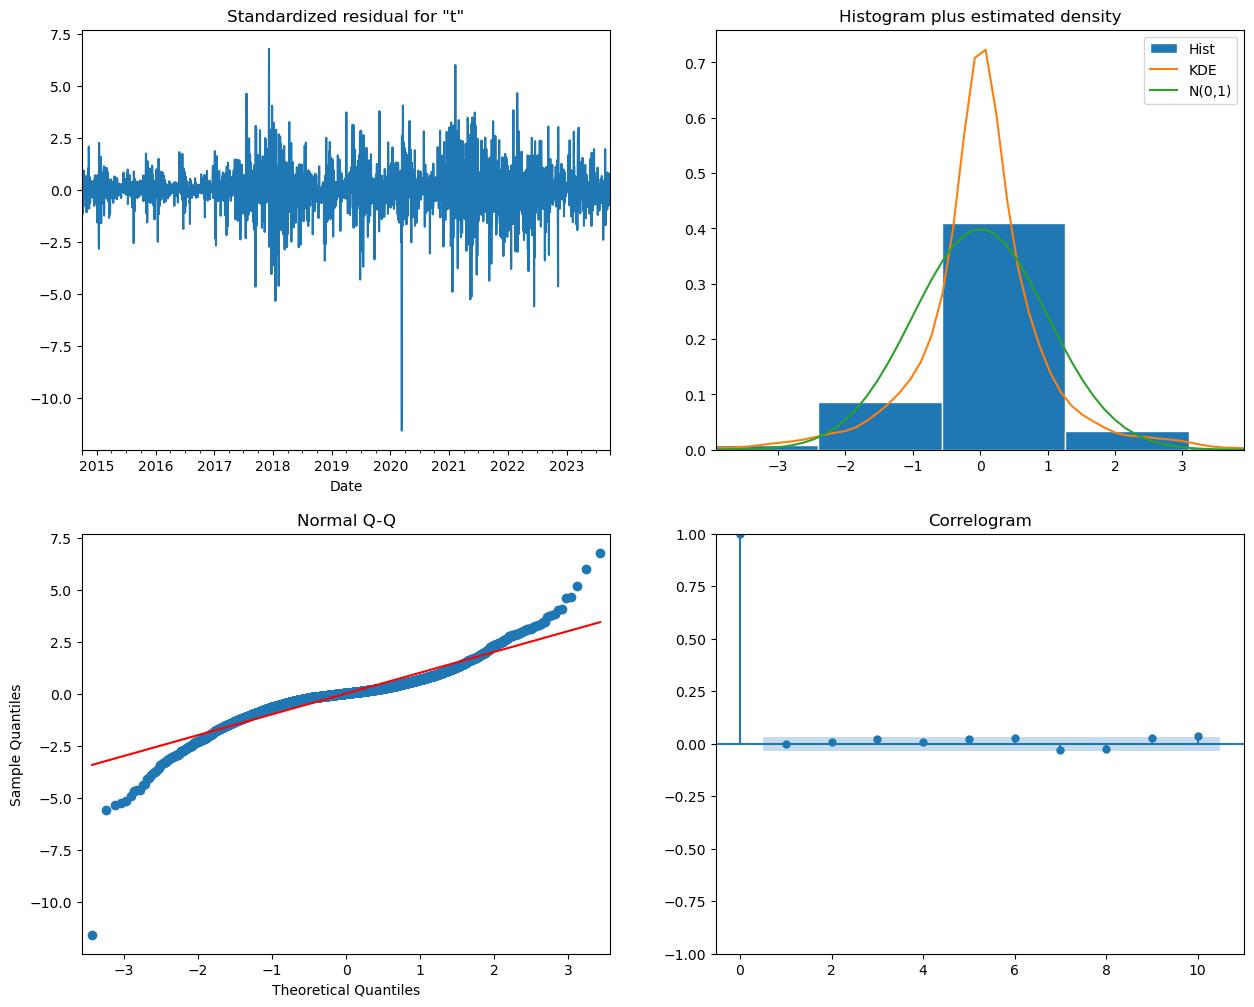

In [26]:
# Plotting the results
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
# Inverse Box-Cox Transformation Function
def inverse_box_cox(y,lambda_best_fit):
   if lambda_best_fit == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lambda_best_fit*y+1)/lambda_best_fit))

# Predictions

<Figure size 640x480 with 0 Axes>

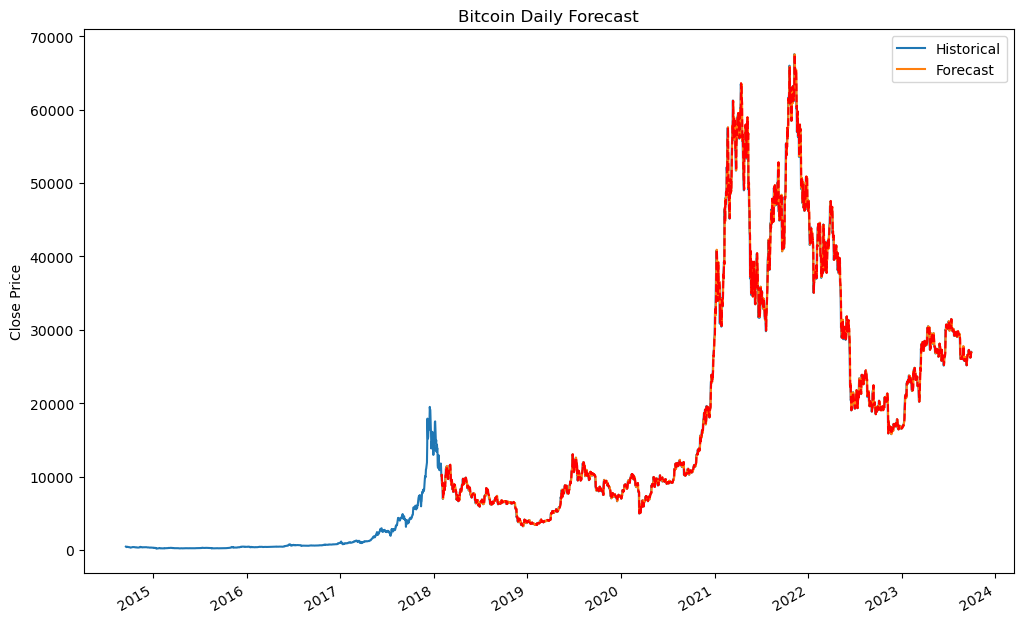

In [28]:
# Define date range for predictions
date_list = [datetime(2022, 6, 30), datetime(2022, 7, 30), datetime(2022, 8, 31), datetime(2022, 9, 30)]
future = pd.DataFrame(index=date_list, columns=['Close'])
# Concatenate predictions with future dates
btc_pred = pd.concat([btc_day[['Close']], future]) 
# Make predictions
forecast_start_date = datetime(2018, 1, 31)
forecast_end_date = datetime(2023, 12, 2)
forecast = results.predict(start=forecast_start_date, end=forecast_end_date)
# Inverse Box-Cox transformation
forecast_original_scale =inverse_box_cox(forecast, lambda_best_fit)
# Add the forecasted values to the btc_pred DataFrame
btc_pred['Forecast'] = forecast_original_scale
plt.figure()
# Plot the Bitcoin price data and the Forecast
btc_pred.plot()
btc_pred['Forecast'].plot(color='r', ls='--', label='Predicted Close')  
plt.legend(['Historical', 'Forecast'])  
plt.title('Bitcoin Daily Forecast')
plt.ylabel('Close Price')
plt.gcf().set_size_inches(12, 8)  
plt.show()

In [29]:
# Print the DataFrame with Date, Close, and Forecast columns
print(btc_pred[['Close', 'Forecast']].tail(24))

                   Close      Forecast
2023-09-11  25162.654297  25918.328487
2023-09-12  25833.343750  25176.420105
2023-09-13  26228.324219  25818.833777
2023-09-14  26539.673828  26276.526171
2023-09-15  26608.693359  26550.009010
2023-09-16  26568.281250  26646.692075
2023-09-17  26534.187500  26504.778694
2023-09-18  26754.281250  26535.403004
2023-09-19  27211.117188  26809.931275
2023-09-20  27132.007813  27266.272638
2023-09-21  26567.632813  27193.544381
2023-09-22  26579.568359  26570.829388
2023-09-23  26579.390625  26655.267935
2023-09-24  26256.826172  26577.725533
2023-09-25  26298.480469  26261.171931
2023-09-26  26217.250000  26338.486797
2023-09-27  26352.716797  26239.974896
2023-09-28  27021.546875  26380.096798
2023-09-29  26911.720703  26950.632396
2023-09-30  26954.935547  26917.843779
2022-06-30           NaN  20058.500504
2022-07-30           NaN  23877.749142
2022-08-31           NaN  19876.094717
2022-09-30           NaN  19560.256619


In [30]:
# Define actual and forecasted values
actual_values = btc_pred['Close'].loc[datetime(2022, 2, 28):datetime(2023, 9, 30)] 
forecasted_values = btc_pred['Forecast'].loc[datetime(2022, 2, 28):datetime(2023, 9, 30)]  # Forecasted Bitcoin prices
# Calculate MAE, MSE, RMSE, MAPE, and R-squared score
mae = np.mean(np.abs(actual_values - forecasted_values))
mse = np.mean((actual_values - forecasted_values)**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100
r_squared = r2_score(actual_values, forecasted_values)
# Print oout of metrics
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R-squared score: {r_squared:.2f}")

MAE: 510.56
RMSE: 805.69
MAPE: 1.93%
R-squared score: 0.99
